<a href="https://colab.research.google.com/github/hmada179/DT_-_Ensemble_Learning_Task/blob/main/DT_%26_Ensemble_Learning_Task_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/titanic-passengers.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [ ]:
data['FamilySize'] = data['Parch'] + data['SibSp'] +1

In [ ]:
data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket', 'Parch', 'SibSp'],axis=1,inplace=True)


In [ ]:
data.describe()

,Pclass,Age,Fare,FamilySize
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,1.904602
std,0.836071,14.526497,49.693429,1.613459
min,1.000000,0.420000,0.000000,1.000000
25%,2.000000,20.125000,7.910400,1.000000
50%,3.000000,28.000000,14.454200,1.000000
75%,3.000000,38.000000,31.000000,2.000000
max,3.000000,80.000000,512.329200,11.000000


In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,No,2,male,28.0,13.0000,S,1
1,No,3,male,25.0,7.6500,S,1
2,No,3,male,20.0,7.8542,S,1
3,No,3,female,29.0,21.0750,S,5
4,No,1,male,31.0,52.0000,S,2


In [ ]:
data['Survived'] = data['Survived'].replace({'No':0,'Yes':1})
data['Sex'] = data['Sex'].replace({'male':0, 'female':1})
data['Embarked'] = data['Embarked'].replace({'S':0, 'C':1, 'Q':2})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    int64  
 3   Age         889 non-null    float64
 4   Fare        889 non-null    float64
 5   Embarked    889 non-null    int64  
 6   FamilySize  889 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [ ]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,2,0,28.0,13.0000,0,1
1,0,3,0,25.0,7.6500,0,1
2,0,3,0,20.0,7.8542,0,1
3,0,3,1,29.0,21.0750,0,5
4,0,1,0,31.0,52.0000,0,2


In [ ]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,340


In [ ]:
data.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.350956,29.315152,32.096681,0.362205,1.906637
std,0.486260,0.834700,0.477538,12.984932,49.697504,0.636157,1.614703
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,7.895800,0.000000,1.000000
50%,0.000000,3.000000,0.000000,28.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,11.000000


In [ ]:
columns = data.columns.to_list()

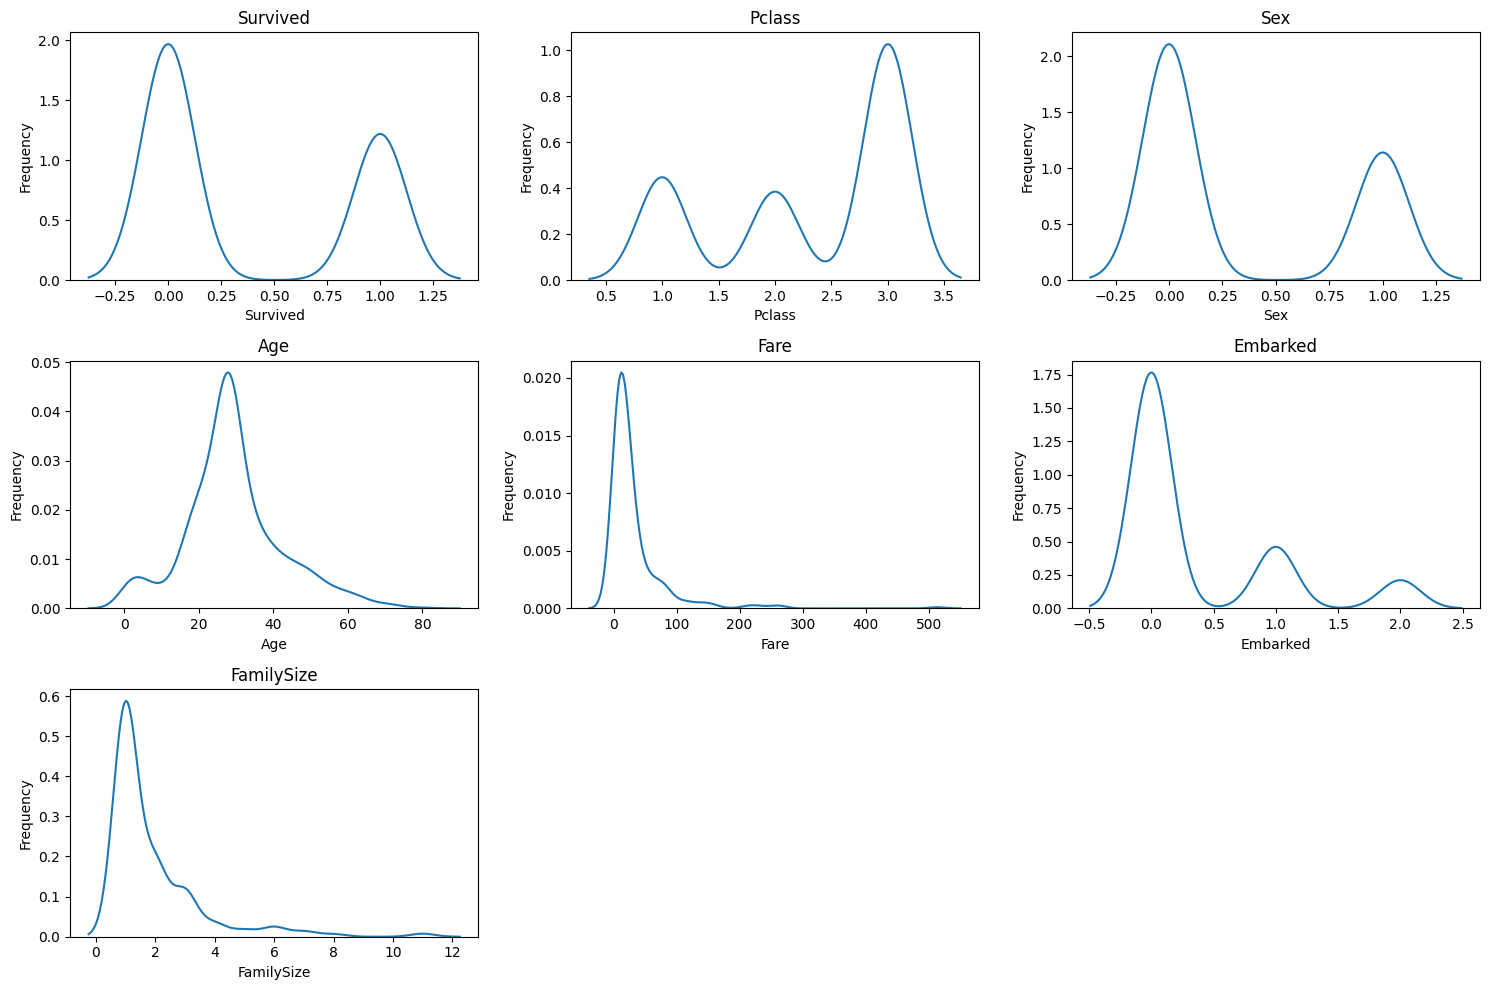

In [ ]:
plt.figure(figsize=(15,10))
for col in columns:
  plt.subplot(3,3,columns.index(col)+1)
  sns.kdeplot(data[col])
  plt.tight_layout()
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
plt.show()

In [ ]:
X = data.drop('Survived', axis =1)
y = data['Survived']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import classification_report

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
reg = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
reg.score(X_test, y_test)

0.8090909090909091

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       116
           1       0.79      0.81      0.80       104

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220



# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
reg = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [567]:
reg.score(X_test, y_test)

0.8454545454545455

In [568]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       116
           1       0.82      0.86      0.84       104

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



# **XGBClassifier**

In [569]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)
reg = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [570]:
reg.score(X_test, y_test)

0.8181818181818182

In [571]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       116
           1       0.81      0.80      0.81       104

    accuracy                           0.82       220
   macro avg       0.82      0.82      0.82       220
weighted avg       0.82      0.82      0.82       220

